In [2]:
import matplotlib.pyplot as plt

import numpy as np
import densmap as dm
from matplotlib import cm
import scipy.optimize as opt

In [3]:
# Function for detecting the interface
def detect_interface(darray,z0,nwin=10):
    i0 = np.abs(z-z0).argmin()
    imax = Nz-i0+1
    branch = np.zeros((2,imax-i0),dtype=float)
    for j in range(i0, imax) :
        branch[1,j-i0] = z_fold[j]
        dtar = 0.5*max(np.mean(darray[:nwin,j]),np.mean(darray[-nwin:,j]))
        for i in range(1,Nx//2) :
            if darray[i,j] > dtar and darray[i-1,j] < dtar or darray[i,j] < dtar and darray[i-1,j] > dtar :
                branch[0,j-i0] = ((darray[i,j]-dtar)*x[i-1]+(dtar-darray[i-1,j])*x[i])/(darray[i,j]-darray[i-1,j])
                break
    return branch

In [271]:
def arccot(x) :
    return 0.5*np.pi-np.arctan(x)

<h2>Extracting interface and contact angles</h2>

In [272]:
# FP = dm.fitting_parameters( par_file='parameters_shear_pen.txt' )
FP = dm.fitting_parameters( par_file='parameters_shear_hex.txt' )
liq1 = 'SOL'
liq2 = 'HEX'
# liq2 = 'PEN'
file_root = 'flow_'

[densmap] Initializing fitting parameters data structure


In [273]:
""" Reading input """
folder_name = FP.folder_name
Lx = FP.lenght_x
Lz = FP.lenght_z
n_init = FP.first_stamp
n_fin = FP.last_stamp
dt = FP.time_step

In [274]:
""" Creating meshgrid """
density_array = dm.read_density_file(folder_name+'/'+file_root+liq1+'_{:05d}'.format(n_init)+'.dat', bin='y')
Nx = density_array.shape[0]
Nz = density_array.shape[1]
hx = Lx/Nx
hz = Lz/Nz
x = hx*np.arange(0.0,Nx,1.0, dtype=float)+0.5*hx
z = hz*np.arange(0.0,Nz,1.0, dtype=float)+0.5*hz
X, Z = np.meshgrid(x, z, sparse=False, indexing='ij')
ihalf = (Nx//2)+(Nx%2)
density_array_sol_avg = np.zeros_like(density_array)
density_array_but_avg = np.zeros_like(density_array)

In [275]:
x_fold = hx*np.arange(0.0,Nx//2,1.0, dtype=float)+0.5*hx
z_fold = z
X_fold, Z_fold = np.meshgrid(x_fold, z_fold, sparse=False, indexing='ij')

In [276]:
n_dump = 10

for idx in range(n_init, n_fin+1 ):
    
    if idx%n_dump==0 :
        print("Obtainig frame "+str(idx))
        t_label = str(dt*idx)+' ps'

    density_array = dm.read_density_file(folder_name+'/'+file_root+liq1+'_{:05d}'.format(idx)+'.dat', bin='y')
    
    density_x = np.mean(density_array,axis=1)
    xcom = np.sum(density_x*x)/np.sum(density_x)
    icom = int(np.round(xcom/hx))
    ishift = ihalf-icom
    
    density_array = np.roll(density_array, ishift, axis=0)
    density_array_sol_avg += density_array

    density_array = dm.read_density_file(folder_name+'/'+file_root+liq2+'_{:05d}'.format(idx)+'.dat', bin='y')
    density_x = np.mean(density_array,axis=1)
    # xcom = np.sum(density_x*x)/np.sum(density_x)
    # icom = int(np.round(xcom/hx))
    # ishift = ihalf-icom
    # density_array = np.roll(density_array, -ishift, axis=0)
    density_array = np.roll(density_array, ishift, axis=0)
    density_array_but_avg += density_array
    
density_array_sol_avg /= (n_fin-n_init+1)
density_array_but_avg /= (n_fin-n_init+1)

Obtainig frame 3090
Obtainig frame 3100
Obtainig frame 3110
Obtainig frame 3120
Obtainig frame 3130
Obtainig frame 3140
Obtainig frame 3150
Obtainig frame 3160
Obtainig frame 3170
Obtainig frame 3180
Obtainig frame 3190
Obtainig frame 3200
Obtainig frame 3210
Obtainig frame 3220
Obtainig frame 3230
Obtainig frame 3240
Obtainig frame 3250
Obtainig frame 3260
Obtainig frame 3270
Obtainig frame 3280
Obtainig frame 3290
Obtainig frame 3300
Obtainig frame 3310
Obtainig frame 3320
Obtainig frame 3330
Obtainig frame 3340
Obtainig frame 3350
Obtainig frame 3360
Obtainig frame 3370
Obtainig frame 3380
Obtainig frame 3390
Obtainig frame 3400
Obtainig frame 3410
Obtainig frame 3420
Obtainig frame 3430
Obtainig frame 3440
Obtainig frame 3450
Obtainig frame 3460
Obtainig frame 3470
Obtainig frame 3480
Obtainig frame 3490
Obtainig frame 3500
Obtainig frame 3510
Obtainig frame 3520
Obtainig frame 3530
Obtainig frame 3540
Obtainig frame 3550
Obtainig frame 3560
Obtainig frame 3570
Obtainig frame 3580


In [277]:
xwin_wat = np.array([30,50])
zwin_wat = np.array([5,15])
xwin_but1 = np.array([0,10])
xwin_but2 = np.array([70,80])
zwin_but = np.array([5,15])

nxwin_wat = np.array(xwin_wat/hx,dtype=int)
nzwin_wat = np.array(zwin_wat/hz,dtype=int)
nxwin_but1 = np.array(xwin_but1/hx,dtype=int)
nxwin_but2 = np.array(xwin_but2/hx,dtype=int)
nzwin_but = np.array(zwin_but/hz,dtype=int)

rho_wat = 1.66054*np.mean(density_array_sol_avg[nxwin_wat[0]:nxwin_wat[1],nzwin_wat[0]:nzwin_wat[1]])
rho_but1 = 1.66054*np.mean(density_array_but_avg[nxwin_but1[0]:nxwin_but1[1],nzwin_but[0]:nzwin_but[1]])
rho_but2 = 1.66054*np.mean(density_array_but_avg[nxwin_but2[0]:nxwin_but2[1],nzwin_but[0]:nzwin_but[1]])
rho_but = 0.5*(rho_but1+rho_but2)

chi = 1.66054*(density_array_sol_avg/rho_wat+density_array_but_avg/rho_but)

<IPython.core.display.Javascript object>


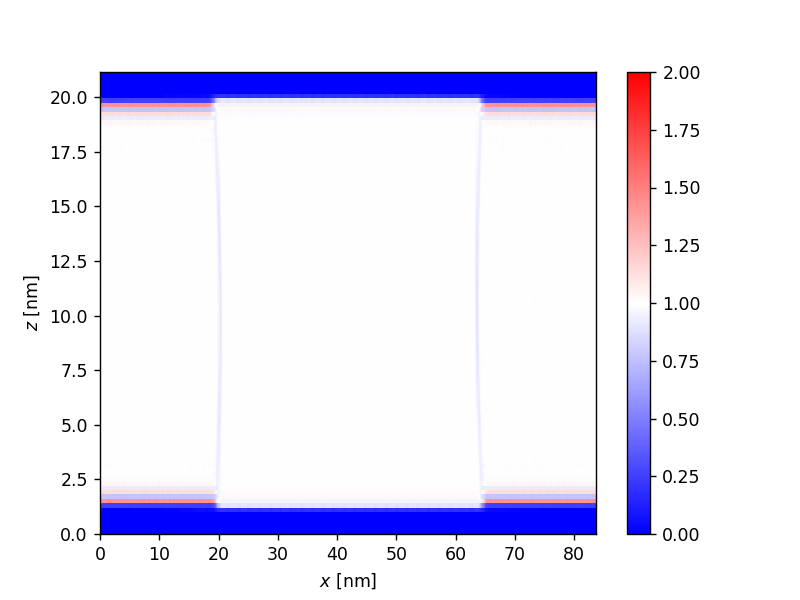

In [278]:
%matplotlib notebook

plt.pcolormesh(X, Z, chi, cmap=cm.bwr, vmin=0, vmax=2)
plt.tick_params(axis='both')
plt.ylabel(r'$z$ [nm]')
plt.xlabel(r'$x$ [nm]')
plt.colorbar()

plt.show()

<IPython.core.display.Javascript object>


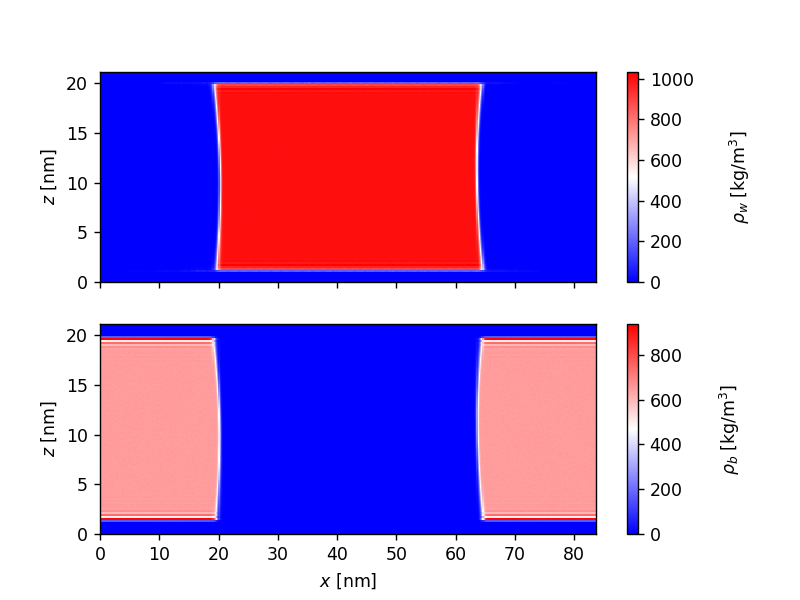

In [279]:
%matplotlib notebook

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

dmap1 = ax1.pcolormesh(X, Z, 1.66054*density_array_sol_avg, cmap=cm.bwr)
ax1.tick_params(axis='both')
ax1.set_ylabel(r'$z$ [nm]')
cb1 = plt.colorbar(dmap1,ax=ax1)
cb1.set_label(r'$\rho_w$ [kg/m$^3$]', labelpad=20)

dmap2 = ax2.pcolormesh(X, Z, 1.66054*density_array_but_avg, cmap=cm.bwr)
ax2.tick_params(axis='both')
ax2.set_ylabel(r'$z$ [nm]')
ax2.set_xlabel(r'$x$ [nm]')
cb2 = plt.colorbar(dmap2,ax=ax2)
cb2.set_label(r'$\rho_b$ [kg/m$^3$]', labelpad=20)

plt.show()

In [280]:
z0_ref = 1.5
i_local_ca = 3
density_array_sol_avglr = 0.5*(density_array_sol_avg[:Nx//2,:]+
                               np.flipud(np.fliplr(density_array_sol_avg[-Nx//2+1:,:])))
branch_sol = detect_interface(density_array_sol_avglr,z0=z0_ref)

In [281]:
density_array_but_avglr = 0.5*(density_array_but_avg[:Nx//2,:]+
                               np.flipud(np.fliplr(density_array_but_avg[-Nx//2+1:,:])))
branch_but = detect_interface(density_array_but_avglr,z0=z0_ref)

<IPython.core.display.Javascript object>


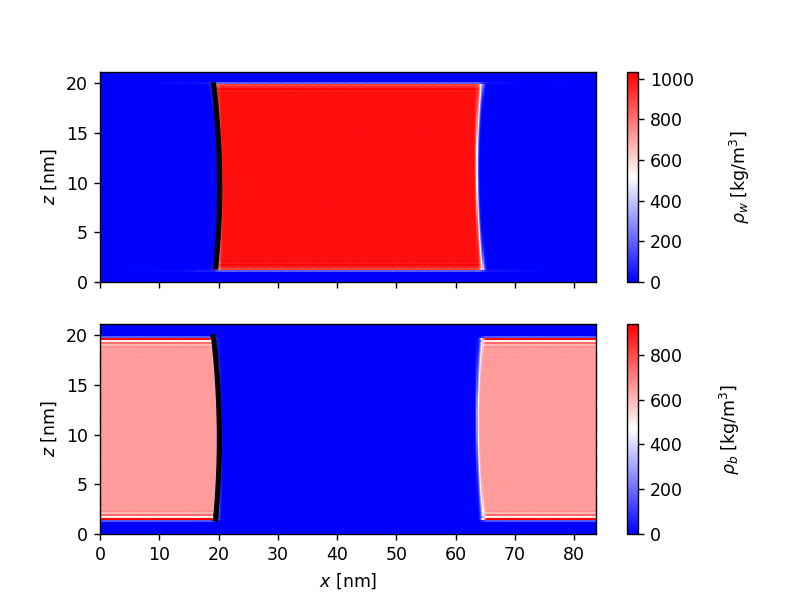

In [282]:
%matplotlib notebook

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

dmap1 = ax1.pcolormesh(X, Z, 1.66054*density_array_sol_avg, cmap=cm.bwr)
ax1.plot(branch_sol[0,:], branch_sol[1,:],'k-',linewidth=3)
ax1.tick_params(axis='both')
ax1.set_ylabel(r'$z$ [nm]')
cb1 = plt.colorbar(dmap1,ax=ax1)
cb1.set_label(r'$\rho_w$ [kg/m$^3$]', labelpad=20)

dmap2 = ax2.pcolormesh(X, Z, 1.66054*density_array_but_avg, cmap=cm.bwr)
ax2.plot(branch_but[0,:], branch_but[1,:],'k-',linewidth=3)
ax2.tick_params(axis='both')
ax2.set_ylabel(r'$z$ [nm]')
ax2.set_xlabel(r'$x$ [nm]')
cb2 = plt.colorbar(dmap2,ax=ax2)
cb2.set_label(r'$\rho_b$ [kg/m$^3$]', labelpad=20)

plt.show()

In [283]:
# TANGENT-BASED
npoint = len(branch_sol[0,:])
m_sol = []
m_but = []
m_sol.append(np.polyfit(branch_sol[0,:3],branch_sol[1,:3],deg=1)[0])
m_but.append(np.polyfit(branch_but[0,:3],branch_but[1,:3],deg=1)[0])
for i in range(1,npoint-1) :
    m_sol.append(np.polyfit(branch_sol[0,i-1:i+2],branch_sol[1,i-1:i+2],deg=1)[0])
    m_but.append(np.polyfit(branch_but[0,i-1:i+2],branch_but[1,i-1:i+2],deg=1)[0])
m_sol.append(np.polyfit(branch_sol[0,-3:],branch_sol[1,-3:],deg=1)[0])
m_but.append(np.polyfit(branch_but[0,-3:],branch_but[1,-3:],deg=1)[0])

In [284]:
m_sol = np.array(m_sol)
m_but = np.array(m_but)

In [285]:
theta_sol = np.abs(np.rad2deg(np.arctan(m_sol)))
theta_but = np.abs(np.rad2deg(np.arctan(m_but)))

In [286]:
# COTANGENT-BASED
npoint = len(branch_sol[0,:])
m_sol = []
m_but = []
m_sol.append(np.polyfit(branch_sol[1,:3],branch_sol[0,:3],deg=1)[0])
m_but.append(np.polyfit(branch_but[1,:3],branch_but[0,:3],deg=1)[0])
for i in range(1,npoint-1) :
    m_sol.append(np.polyfit(branch_sol[1,i-1:i+2],branch_sol[0,i-1:i+2],deg=1)[0])
    m_but.append(np.polyfit(branch_but[1,i-1:i+2],branch_but[0,i-1:i+2],deg=1)[0])
m_sol.append(np.polyfit(branch_sol[1,-3:],branch_sol[0,-3:],deg=1)[0])
m_but.append(np.polyfit(branch_but[1,-3:],branch_but[0,-3:],deg=1)[0])

In [287]:
m_sol = np.array(m_sol)
m_but = np.array(m_but)

In [288]:
theta_sol = np.rad2deg(arccot(m_sol))
theta_but = np.rad2deg(arccot(m_but))

In [289]:
""" FOR THE EQULIBRIUM CONTACT ANGLE """
# print(theta_sol)
# print(branch_sol[1,:])
peq = np.polyfit(branch_sol[1,:],theta_sol,deg=1,full=False,cov=True)
# print(np.polyval(peq[0],branch_sol[1,0]))
# print(peq)
# print(np.sqrt(peq[1][1,1]))

<IPython.core.display.Javascript object>


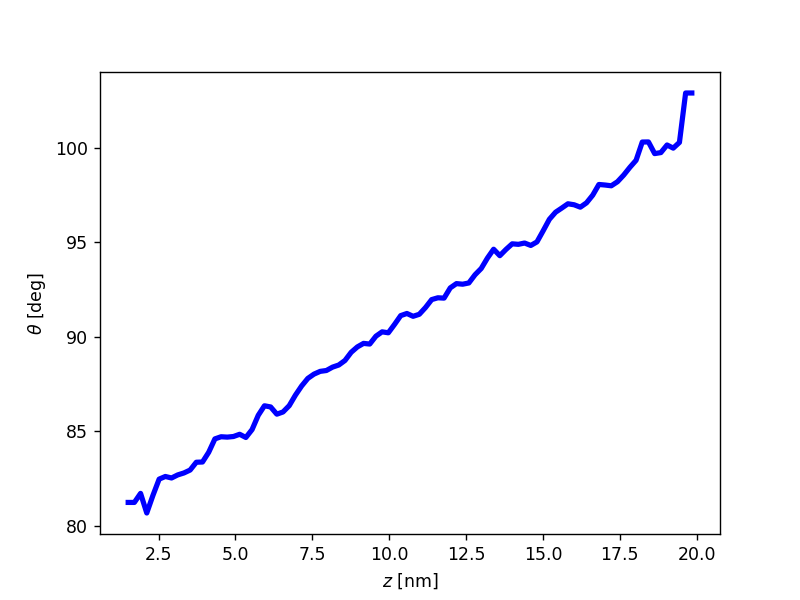

In [290]:
%matplotlib notebook

plt.plot(branch_sol[1,:],theta_sol,'b-',linewidth=3)
# plt.plot(branch_but[1,:],theta_but,'r-',linewidth=3)
plt.ylabel(r'$\theta$ [deg]')
plt.xlabel(r'$z$ [nm]')

plt.show()

In [291]:
# np.savez("InterfaceCurvatureHexane/ca008-q65.npz",branch_sol[1,:],theta_sol)

In [292]:
x_ca_sol_bot = branch_sol[0,:i_local_ca]
z_ca_sol_bot = branch_sol[1,:i_local_ca]
x_ca_sol_top = branch_sol[0,-i_local_ca:]
z_ca_sol_top = branch_sol[1,-i_local_ca:]
x_ca_but_bot = branch_but[0,:i_local_ca]
z_ca_but_bot = branch_but[1,:i_local_ca]
x_ca_but_top = branch_but[0,-i_local_ca:]
z_ca_but_top = branch_but[1,-i_local_ca:]

In [293]:
# TANGENT-BASED
coeff_sol_bot, cov_sol_bot = np.polyfit(x_ca_sol_bot,z_ca_sol_bot,deg=1,full=False,cov=True)
coeff_sol_top, cov_sol_top = np.polyfit(x_ca_sol_top,z_ca_sol_top,deg=1,full=False,cov=True)
coeff_but_bot, cov_but_bot = np.polyfit(x_ca_but_bot,z_ca_but_bot,deg=1,full=False,cov=True)
coeff_but_top, cov_but_top = np.polyfit(x_ca_but_top,z_ca_but_top,deg=1,full=False,cov=True)
slope_sol_bot = coeff_sol_bot[0]
slope_sol_top = coeff_sol_top[0]
slope_but_bot = coeff_but_bot[0]
slope_but_top = coeff_but_top[0]
dslope_sol_bot = np.sqrt(cov_sol_bot[0][0])
dslope_sol_top = np.sqrt(cov_sol_top[0][0])
dslope_but_bot = np.sqrt(cov_but_bot[0][0])
dslope_but_top = np.sqrt(cov_but_top[0][0])

In [294]:
theta_sol_bot = np.rad2deg(np.arctan(slope_sol_bot))
dtheta_sol_bot = 0.5*np.abs(np.rad2deg(np.arctan(slope_sol_bot+dslope_sol_bot))-
                            np.rad2deg(np.arctan(slope_sol_bot-dslope_sol_bot)))
print("theta_sol_bot="+str(theta_sol_bot)+'+/'+str(dtheta_sol_bot))

theta_sol_top = 180-np.rad2deg(np.arctan(slope_sol_top))
dtheta_sol_top = 0.5*np.abs(np.rad2deg(np.arctan(slope_sol_top+dslope_sol_top))-
                            np.rad2deg(np.arctan(slope_sol_top-dslope_sol_top)))
print("theta_sol_top="+str(theta_sol_top)+'+/'+str(dtheta_sol_top))

theta_but_bot = np.rad2deg(np.arctan(slope_but_bot))
dtheta_but_bot = 0.5*np.abs(np.rad2deg(np.arctan(slope_but_bot+dslope_but_bot))-
                            np.rad2deg(np.arctan(slope_but_bot-dslope_but_bot)))
print("theta_but_bot="+str(theta_but_bot)+'+/'+str(dtheta_but_bot))

theta_but_top = 180-np.rad2deg(np.arctan(slope_but_top))
dtheta_but_top = 0.5*np.abs(np.rad2deg(np.arctan(slope_but_top+dslope_but_top))-
                            np.rad2deg(np.arctan(slope_but_top-dslope_but_top)))
print("theta_but_top="+str(theta_but_top)+'+/'+str(dtheta_but_top))

theta_sol_bot=81.11378104746022+/1.071707097880342
theta_sol_top=257.00164310073944+/1.0621195176785534
theta_but_bot=66.61914310457604+/57.36641187274785
theta_but_top=246.42854937981934+/2.510092144456948


In [295]:
# COTANGENT-BASED
coeff_sol_bot, cov_sol_bot = np.polyfit(z_ca_sol_bot,x_ca_sol_bot,deg=1,full=False,cov=True)
coeff_sol_top, cov_sol_top = np.polyfit(z_ca_sol_top,x_ca_sol_top,deg=1,full=False,cov=True)
coeff_but_bot, cov_but_bot = np.polyfit(z_ca_but_bot,x_ca_but_bot,deg=1,full=False,cov=True)
coeff_but_top, cov_but_top = np.polyfit(z_ca_but_top,x_ca_but_top,deg=1,full=False,cov=True)
slope_sol_bot = coeff_sol_bot[0]
slope_sol_top = coeff_sol_top[0]
slope_but_bot = coeff_but_bot[0]
slope_but_top = coeff_but_top[0]
dslope_sol_bot = np.sqrt(cov_sol_bot[0][0])
dslope_sol_top = np.sqrt(cov_sol_top[0][0])
dslope_but_bot = np.sqrt(cov_but_bot[0][0])
dslope_but_top = np.sqrt(cov_but_top[0][0])

In [296]:
theta_sol_bot = np.rad2deg(arccot(slope_sol_bot))
dtheta_sol_bot = 0.5*np.abs(np.rad2deg(arccot(slope_sol_bot+dslope_sol_bot))-
                            np.rad2deg(arccot(slope_sol_bot-dslope_sol_bot)))
print("theta_sol_bot="+str(theta_sol_bot)+'+/'+str(dtheta_sol_bot))

theta_sol_top = 180-np.rad2deg(arccot(slope_sol_top))
dtheta_sol_top = 0.5*np.abs(np.rad2deg(arccot(slope_sol_top+dslope_sol_top))-
                            np.rad2deg(arccot(slope_sol_top-dslope_sol_top)))
print("theta_sol_top="+str(theta_sol_top)+'+/'+str(dtheta_sol_top))

theta_but_bot = np.rad2deg(arccot(slope_but_bot))
dtheta_but_bot = 0.5*np.abs(np.rad2deg(arccot(slope_but_bot+dslope_but_bot))-
                            np.rad2deg(arccot(slope_but_bot-dslope_but_bot)))
print("theta_but_bot="+str(theta_but_bot)+'+/'+str(dtheta_but_bot))

theta_but_top = 180-np.rad2deg(arccot(slope_but_top))
dtheta_but_top = 0.5*np.abs(np.rad2deg(arccot(slope_but_top+dslope_but_top))-
                            np.rad2deg(arccot(slope_but_top-dslope_but_top)))
print("theta_but_top="+str(theta_but_top)+'+/'+str(dtheta_but_top))

theta_sol_bot=81.23973202983862+/1.042303298609042
theta_sol_top=77.08977061569834+/1.0487168476439521
theta_but_bot=80.92702810400445+/11.512511553216108
theta_but_top=66.71961746126705+/2.4626396031269238


<IPython.core.display.Javascript object>


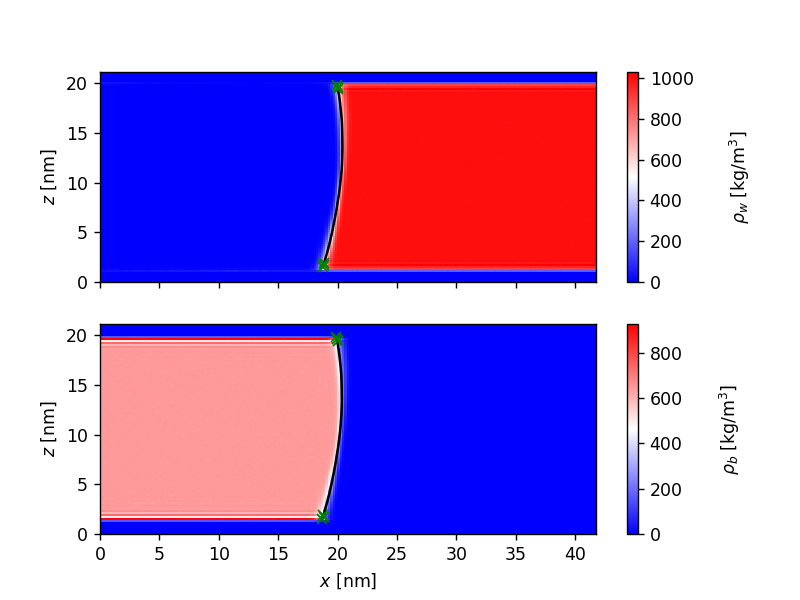

In [247]:
%matplotlib notebook

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

dmap1 = ax1.pcolormesh(X_fold, Z_fold, 1.66054*density_array_sol_avglr, cmap=cm.bwr)
ax1.plot(branch_sol[0,:],branch_sol[1,:],'k-')
ax1.plot(branch_sol[0,:i_local_ca],branch_sol[1,:i_local_ca],'gx')
ax1.plot(branch_sol[0,-i_local_ca:],branch_sol[1,-i_local_ca:],'gx')
ax1.tick_params(axis='both')
ax1.set_ylabel(r'$z$ [nm]')
cb1 = plt.colorbar(dmap1,ax=ax1)
cb1.set_label(r'$\rho_w$ [kg/m$^3$]', labelpad=20)

dmap2 = ax2.pcolormesh(X_fold, Z_fold, 1.66054*density_array_but_avglr, cmap=cm.bwr)
ax2.plot(branch_but[0,:],branch_but[1,:],'k-')
ax2.plot(branch_but[0,:i_local_ca],branch_but[1,:i_local_ca],'gx')
ax2.plot(branch_but[0,-i_local_ca:],branch_but[1,-i_local_ca:],'gx')
ax2.tick_params(axis='both')
ax2.set_ylabel(r'$z$ [nm]')
ax2.set_xlabel(r'$x$ [nm]')
cb2 = plt.colorbar(dmap2,ax=ax2)
cb2.set_label(r'$\rho_b$ [kg/m$^3$]', labelpad=20)

plt.show()

<h2>Computing contact line friction</h2>

In [16]:
# PLOTTING FINAL RESULTS FOR ALL SIMULATIONS
# Hydrophobic (old)
capillary_number = np.array(
                   [0.05,
                    0.06,
                    0.07,
                    0.08,
                    0.09,
                    0.10,
                    0.11,
                    0.12,
                    0.13])
theta_advancing  = [100.62650382656886,
                    100.28930719768756,
                    101.49072703540607,
                    102.50682692047131,
                    103.50630071793175,
                    104.03118002118691,
                    104.58598660451344,
                    105.14585460578715,
                    106.22988181328239]
dtheta_advancing = [0.10795648499997412,
                    0.7610132251041577,
                    0.5496584902347124,
                    0.7437279148235021,
                    0.9418199651037185,
                    1.459336357590054,
                    0.795541402042609,
                    1.8374534647594132,
                    1.8563457642545629]
theta_receding   = [90.67912154956836,
                    89.74565369817059,
                    87.6789654672491,
                    86.17935647076085,
                    83.95470829388582,
                    82.15409004814482,
                    80.9647058109186,
                    79.68152290650399,
                    77.50761277543687,]
dtheta_receding  = [0.9654650838040482,
                    1.2364502238828408,
                    0.9635675640161807,
                    0.3844651133513608,
                    0.6448731778284227,
                    0.020373150667040818,
                    0.0949479487504874,
                    0.3324788547800921,
                    0.5175793305265373]
theta_0          =  97.26240221727994
dtheta_0         =  0.081444264241739

In [5]:
# Hydrophilic (old)
"""
capillary_number = np.array(
                   [0.03,
                    0.04,
                    0.05,
                    0.06,
                    0.07,
                    0.08])
theta_receding   = [73.96950829970838,
                    70.47764894599393,
                    67.37654314204468,
                    65.09460660605647,
                    61.21391862050032,
                    58.44974850729641]
dtheta_receding  = [0.0013671030469524226,
                    0.5711529177676056,
                    0.4770425560956042,
                    0.6274126344333553,
                    0.2062195528770019,
                    1.1554748868083315]
theta_advancing  = [82.22954655518518,
                    84.91415544814703,
                    84.70763536223221,
                    86.81887291740787,
                    87.66708305164146,
                    88.30398882083733]
dtheta_advancing = [1.2324469568179524,
                    0.9557547810030016,
                    1.50942127501294,
                    2.0291532455867127,
                    1.7770515210732754,
                    2.3619278558780437]
theta_0          = 80.91084141031868
dtheta_0         = 0.09505831156180015
"""

In [28]:
# Hydrophilic (new)
capillary_number = np.array(
                   [0.01,
                    0.03,
                    0.04,
                    0.05,
                    0.06,
                    0.07,
                    0.08])
theta_receding   = [76.93072551910545,
                    74.237022303511,
                    70.8822230622249,
                    67.22561955933739,
                    65.55813199791437,
                    61.408313551193515,
                    59.00934712879015]
dtheta_receding  = [0.5647588336768976,
                    0.10132095467086089,
                    0.4596274419461608,
                    0.23743793157125026,
                    0.0909553049175571,
                    0.7221324382111121,
                    1.0932876063604624]
theta_advancing  = [80.0767422214623,
                    81.68949952534248,
                    85.25406195064082,
                    85.2973740206753,
                    86.90787109090178,
                    87.32580050217328,
                    88.02408034293134]
dtheta_advancing = [0.7164041367418221,
                    1.2555269125202528,
                    1.2271383492379755,
                    1.4286264613596344,
                    2.0144925788573715,
                    1.9023527098953252,
                    2.2310940809217286]
theta_0          = 79.16475132276848
dtheta_0         = 1.045510073126497

In [29]:
gamma = 5.19e-2
U0 = 3.72463768115942
Ucl = U0*capillary_number/0.1
print(Ucl)

[0.37246377 1.1173913  1.48985507 1.86231884 2.23478261 2.60724638
 2.97971014]


In [30]:
cos_eq = np.cos(np.deg2rad(theta_0))
sin_eq = np.sin(np.deg2rad(theta_0))

cos_adv = np.cos(np.deg2rad(theta_advancing))
cos_adv = np.concatenate((cos_eq,cos_adv),axis=None)
sin_adv = np.sin(np.deg2rad(theta_advancing))
sin_adv = np.concatenate((sin_eq,sin_adv),axis=None)
ucl_adv = np.concatenate((0,Ucl),axis=None)

cos_rec = np.cos(np.deg2rad(theta_receding))
cos_rec = np.concatenate((cos_rec,cos_eq),axis=None)
sin_rec = np.sin(np.deg2rad(theta_receding))
sin_rec = np.concatenate((sin_rec,sin_eq),axis=None)
ucl_rec = np.concatenate((-Ucl,0),axis=None)

In [31]:
# pfit_adv, cfit_adv = np.polyfit(cos_adv,ucl_adv,deg=1,full=False,cov=True)
# pfit_rec, cfit_rec = np.polyfit(cos_rec,ucl_rec,deg=1,full=False,cov=True)
PF_MD = 2*np.sqrt(2)/3
pfit_adv, cfit_adv = np.polyfit(cos_adv,PF_MD*sin_adv*ucl_adv,deg=1,full=False,cov=True)
pfit_rec, cfit_rec = np.polyfit(cos_rec,PF_MD*sin_rec*ucl_rec,deg=1,full=False,cov=True)

In [32]:
mu_f_adv = -gamma/pfit_adv[0]
ptmp = -gamma/(pfit_adv[0]+np.sqrt(cfit_adv[0][0]))
mtmp = -gamma/(pfit_adv[0]-np.sqrt(cfit_adv[0][0]))
dmu_f_adv = 0.5*(ptmp-mtmp)

print(1e3*mu_f_adv)
print(1e3*dmu_f_adv)

mu_f_rec = -gamma/pfit_rec[0]
ptmp = -gamma/(pfit_rec[0]+np.sqrt(cfit_rec[0][0]))
mtmp = -gamma/(pfit_rec[0]-np.sqrt(cfit_rec[0][0]))
dmu_f_rec = 0.5*(ptmp-mtmp)

print(1e3*mu_f_rec)
print(1e3*dmu_f_rec)

3.1984436255376494
0.28687921321154136
7.272080011989526
0.5356483946158843


<IPython.core.display.Javascript object>


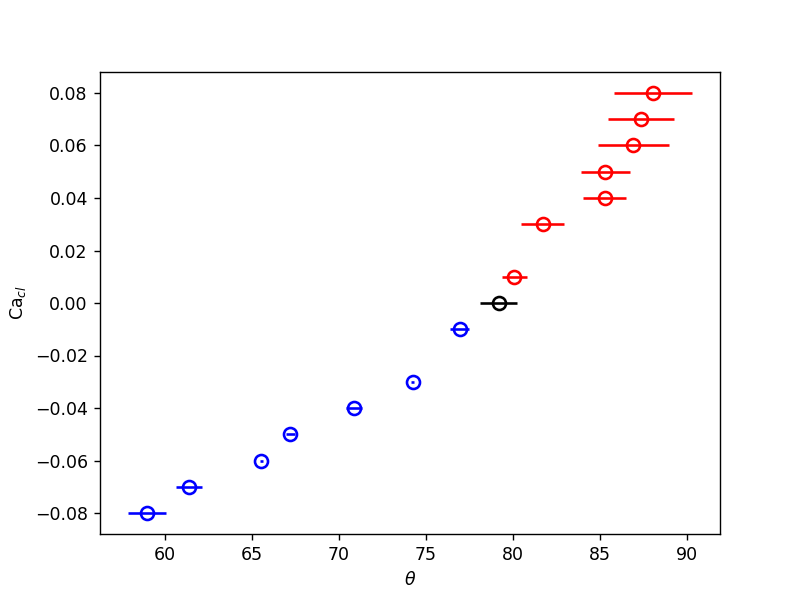

In [33]:
%matplotlib notebook

plt.errorbar(theta_advancing,capillary_number,xerr=dtheta_advancing,
             marker='o',mfc='None',mec='red',ms=7.5,mew=1.5,ls='None',ecolor='r')

plt.errorbar(theta_receding,-capillary_number,xerr=dtheta_receding,
             marker='o',mfc='None',mec='blue',ms=7.5,mew=1.5,ls='None',ecolor='b')

plt.errorbar(theta_0,0,xerr=dtheta_0,
             marker='o',mfc='None',mec='black',ms=7.5,mew=1.5,ls='None',ecolor='k')
plt.xlabel(r'$\theta$')
plt.ylabel(r'Ca$_{cl}$')

plt.show()